In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
# import seaborn as sns

In [2]:
# Load the Csv files
airport_codes = pd.read_csv('airport_codes.csv')
flights = pd.read_csv('flights.csv',low_memory=False)
tickets = pd.read_csv('tickets.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'airport_codes.csv'

In [ ]:
#Ch
# flights.iloc[:, [3, 13, 14]]

In [ ]:
# Lets review the data one csv at a time starting with aiport codes

def review_df(df):
    print(df.head())
    print("-----------------------------\n")
    # Check the data types and any missing values
    print(df.info())
    print("-----------------------------\n")
    # Check for missing values
    print ("Counts of Nulls")
    print(df.isnull().sum())
    # View unique columns and count to ensure to check data quality
    print("-----------------------------\n")

In [ ]:
def conversion(columns,df,conversion_type):
    df = df.copy()
    df_copy = df.copy()
    def convert_to_numeric():
        for col in columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    def convert_to_datetime():
        for col in columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

    # Dispatch based on conversion type
    if conversion_type == 'numeric':
        convert_to_numeric()
    elif conversion_type == 'date':
        convert_to_datetime()
    else:
        raise ValueError("Invalid conversion type. Please specify 'numeric' or 'date'.")

    timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
    csv_filename = 'failed_conversion_values_{}.csv'.format(timestamp)
    failed_conversion_indices = df[df[[columns] if isinstance(columns, str) else columns].isnull().any(axis=1)].index
    failed_conversion_df = df_copy.loc[failed_conversion_indices, columns]

    print("Rows that failed data type conversion")
    print(failed_conversion_df)
    return df
    # Save to CSV --for further review
    #failed_conversion_df.to_csv(csv_filename, index=False)

In [ ]:
def fillNa(column,df,scope,group_cols=None):
    df = df.copy()

    def fill_na(col):
        df[col].fillna(0, inplace=True)
    def fill_median(col):
        if group_cols:
            df[col] = df.groupby(group_cols)[col].transform(lambda x: x.fillna(x.median()))
        else:
            df[col].fillna(df[col].median(), inplace=True)

    if isinstance(column, str):
        columns = [column]
    elif isinstance(column, list):
        columns = column
    else:
        raise ValueError("Column must be a string or a list of strings.")

    for col in columns:
        if scope == 'zero':
            fill_na(col)
        elif scope == 'median':
            fill_median(col)
        else:
            raise ValueError("Invalid scope. Scope must be 'zero' or 'median'.")
    print("Fill INs Completed")
    return df

In [ ]:
# Plotting

def plot_histogram(df,cols):
    df[cols].hist(bins=50, figsize=(12, 10))
    plt.suptitle('Cleaned Histograms of Numerical Columns')
    plt.show()

def plot_box(df,cols):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(cols, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(y=df[column])
        plt.title(f'Box Plot of {column}')
    plt.tight_layout()
    plt.show()

In [ ]:
# Observations
# Aiport_codes: 8x55369
# Important fields: [TYPE - to determine size ; IATA_CODE to link with other data; ISO_COUNTRY (US flights)]
# Large Number of NULL IATA_CODE code
review_df(airport_codes)

            TYPE                                NAME  ELEVATION_FT CONTINENT  \
0       heliport                   Total Rf Heliport          11.0       NaN   
1  small_airport                Aero B Ranch Airport        3435.0       NaN   
2  small_airport                        Lowell Field         450.0       NaN   
3  small_airport                        Epps Airpark         820.0       NaN   
4         closed  Newport Hospital & Clinic Heliport         237.0       NaN   

  ISO_COUNTRY  MUNICIPALITY IATA_CODE                            COORDINATES  
0          US      Bensalem       NaN     -74.93360137939453, 40.07080078125  
1          US         Leoti       NaN                 -101.473911, 38.704022  
2          US  Anchor Point       NaN            -151.695999146, 59.94919968  
3          US       Harvest       NaN  -86.77030181884766, 34.86479949951172  
4          US       Newport       NaN                    -91.254898, 35.6087  
-----------------------------

<class 'pandas

In [ ]:
#  airport_codes[airport_codes['ISO_COUNTRY']=='US' & airport_codes['IATA_CODE'].isnull()]
airport_codes[(airport_codes['ISO_COUNTRY']=='US') & (airport_codes['TYPE'].isin(['medium_airport','large_airport']))]

TYPE                                               NAME  \
6194   medium_airport                            Aleknagik / New Airport   
25963  medium_airport  South Alabama Regional At Bill Benton Field Ai...   
26143  medium_airport                Lehigh Valley International Airport   
26144  medium_airport                           Abilene Regional Airport   
26145   large_airport                  Albuquerque International Sunport   
...               ...                                                ...   
49351  medium_airport                              Jim's Private Airport   
49519  medium_airport                              Yuma Auxiliary AAF #2   
49569   large_airport                                                atl   
49837  medium_airport       Williston Basin International Airport (U.C.)   
50008  medium_airport                                        34S Airport   

       ELEVATION_FT CONTINENT ISO_COUNTRY   MUNICIPALITY IATA_CODE  \
6194           66.0       NaN          US      Aleknagik       WKK   
25963         310.0       NaN          US  Andalusia/Opp       NaN   
26143         393.0       NaN          US      Allentown       ABE   
26144        1791.0       NaN          US        Abilene       ABI   
26145        5355.0       NaN          US    Albuquerque       ABQ   
...             ...       ...         ...            ...       ...   
49351         890.0       NaN          US        Conyers       NaN   
49519           NaN       NaN          US            NaN       NaN   
49569           NaN       NaN          US            NaN       NaN   
49837        2344.0       NaN          US      Williston       NaN   
50008           NaN       NaN          US            NaN       NaN   

                               COORDINATES  
6194         -158.617996216, 59.2826004028  
25963                  -86.393799, 31.3088  
26143  -75.44080352783203, 40.652099609375  
26144    -99.68190002440001, 32.4113006592  
26145               -106.609001, 35.040199  
...                                    ...  
49351            -84.14440155, 33.59790039  
49519               -114.511383, 32.548984  
49569                   -84.375, 33.137551  
49837               -103.748797, 48.258387  
50008                   -16.875, 19.145168  

[858 rows x 8 columns]

In [ ]:
#medium_airport, large_airport are the only airports for this scope
# Filter data for medium and large airports
medium_large_US_airports = airport_codes[(airport_codes['TYPE'].isin(['medium_airport', 'large_airport'])) & (airport_codes['ISO_COUNTRY']=='US')]

# Display the filtered data
print(medium_large_US_airports)
print(medium_large_US_airports.isnull().sum())
#Resulting data set: [858 rows x 8 columns]


                 TYPE                                               NAME  \
6194   medium_airport                            Aleknagik / New Airport   
25963  medium_airport  South Alabama Regional At Bill Benton Field Ai...   
26143  medium_airport                Lehigh Valley International Airport   
26144  medium_airport                           Abilene Regional Airport   
26145   large_airport                  Albuquerque International Sunport   
...               ...                                                ...   
49351  medium_airport                              Jim's Private Airport   
49519  medium_airport                              Yuma Auxiliary AAF #2   
49569   large_airport                                                atl   
49837  medium_airport       Williston Basin International Airport (U.C.)   
50008  medium_airport                                        34S Airport   

       ELEVATION_FT CONTINENT ISO_COUNTRY   MUNICIPALITY IATA_CODE  \
6194           66

In [ ]:
# 687/5146 ~ 13% NUll IATA_CODE
# After filtered for US 37/858 ~4%
#Analysing the NULL IATA_CODE, since we are only interested in US flights filter on ISO_COUNTRY & see how many nulls
#IATA_CODE are left

# country_US = medium_large_airports['ISO_COUNTRY']=='US'
# IATA_CODE_NULL = medium_large_airports['IATA_CODE'].isnull()

# print((medium_large_airports[country_US & IATA_CODE_NULL]).count())

#ONLY 37 values of IATA_CODE are Null for ISO_COUNTRY = 'US'


In [ ]:
# Drop rows where IATA_CODE is null
airport_codes_cleaned = medium_large_US_airports.dropna(subset=['IATA_CODE'])

# Display the cleaned DataFrame
print(airport_codes_cleaned)
# Final row count: [821 rows x 8 columns]
#Final Check
print("*********Null count*************")
print(airport_codes_cleaned.isnull().sum())


                 TYPE                                 NAME  ELEVATION_FT  \
6194   medium_airport              Aleknagik / New Airport          66.0   
26143  medium_airport  Lehigh Valley International Airport         393.0   
26144  medium_airport             Abilene Regional Airport        1791.0   
26145   large_airport    Albuquerque International Sunport        5355.0   
26146  medium_airport            Aberdeen Regional Airport        1302.0   
...               ...                                  ...           ...   
38972  medium_airport                      Kahului Airport          54.0   
38974  medium_airport               Bradshaw Army Airfield        6190.0   
38975  medium_airport           Hilo International Airport          38.0   
38976  medium_airport                        Upolu Airport          96.0   
39286  medium_airport               Point Lay LRRS Airport          22.0   

      CONTINENT ISO_COUNTRY    MUNICIPALITY IATA_CODE  \
6194        NaN          US   

In [ ]:
# Remove duplicates and create final dataframe with the important columns

airport_imp_columns = ['TYPE', 'ISO_COUNTRY', 'IATA_CODE']

# Create a copy of the selected columns from 'airport_codes_cleaned'
final_airport_codes = airport_codes_cleaned[airport_imp_columns].copy()

# Drop duplicates based on selected columns
final_airport_codes.drop_duplicates(subset=airport_imp_columns, inplace=True)

# Check for duplicates after dropping
duplicates = final_airport_codes[final_airport_codes.duplicated()]
if not duplicates.empty:
    print("Duplicates found after dropping:")
    print(duplicates)
else:
    print("No duplicates found after dropping.")

# airport_codes_cleaned[airport_codes_cleaned['IATA_CODE']=='JNB']

No duplicates found after dropping.


In [ ]:
review_df(final_airport_codes)
# 3 X 821

                 TYPE ISO_COUNTRY IATA_CODE
6194   medium_airport          US       WKK
26143  medium_airport          US       ABE
26144  medium_airport          US       ABI
26145   large_airport          US       ABQ
26146  medium_airport          US       ABR
-----------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 821 entries, 6194 to 39286
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TYPE         821 non-null    object
 1   ISO_COUNTRY  821 non-null    object
 2   IATA_CODE    821 non-null    object
dtypes: object(3)
memory usage: 25.7+ KB
None
-----------------------------

Counts of Nulls
TYPE           0
ISO_COUNTRY    0
IATA_CODE      0
dtype: int64
-----------------------------



In [ ]:
#---------flights = pd.read_csv('data/flights.csv')-----------------

In [ ]:
review_df(flights)
# Observations
# Flights: 16x1915886
flights_imp_columns = ['FL_DATE','ORIGIN','DESTINATION','DEP_DELAY','ARR_DELAY','CANCELLED','DISTANCE','OCCUPANCY_RATE','OP_CARRIER']
# Important fields: [FL_DATE - Q1 2019 ; ORIGIN ;DESTINATION; DEP_DELAY,ARR_DELAY
# memory usage: 233.9+ MB
# NULLS
# DEP_DELAY            50351
# ARR_DELAY            55991
# AIR_TIME             56551
# DISTANCE               630
# OCCUPANCY_RATE         310

      FL_DATE OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID ORIGIN  \
0  2019-03-02         WN   N955WN              4591              14635    RSW   
1  2019-03-02         WN   N8686A              3231              14635    RSW   
2  2019-03-02         WN   N201LV              3383              14635    RSW   
3  2019-03-02         WN   N413WN              5498              14635    RSW   
4  2019-03-02         WN   N7832A              6933              14635    RSW   

  ORIGIN_CITY_NAME  DEST_AIRPORT_ID DESTINATION DEST_CITY_NAME  DEP_DELAY  \
0   Fort Myers, FL            11042         CLE  Cleveland, OH       -8.0   
1   Fort Myers, FL            11066         CMH   Columbus, OH        1.0   
2   Fort Myers, FL            11066         CMH   Columbus, OH        0.0   
3   Fort Myers, FL            11066         CMH   Columbus, OH       11.0   
4   Fort Myers, FL            11259         DAL     Dallas, TX        0.0   

   ARR_DELAY  CANCELLED AIR_TIME DISTANCE  OCCUPAN

In [ ]:
filtered_flights = flights[flights_imp_columns][flights['CANCELLED']==0]

# Check of the flight data has US medium and large airports

# iata_set = set(airport_codes['IATA_CODE'])
# valid_origin = filtered_flights['ORIGIN'].isin(iata_set)
# valid_destination = filtered_flights['DESTINATION'].isin(iata_set)
# valid_flights = filtered_flights[valid_origin & valid_destination]
# review_df(valid_flights) 1864272
# found same count
review_df(filtered_flights)

      FL_DATE ORIGIN DESTINATION  DEP_DELAY  ARR_DELAY  CANCELLED DISTANCE  \
0  2019-03-02    RSW         CLE       -8.0       -6.0        0.0   1025.0   
1  2019-03-02    RSW         CMH        1.0        5.0        0.0    930.0   
2  2019-03-02    RSW         CMH        0.0        4.0        0.0    930.0   
3  2019-03-02    RSW         CMH       11.0       14.0        0.0    930.0   
4  2019-03-02    RSW         DAL        0.0      -17.0        0.0   1005.0   

   OCCUPANCY_RATE OP_CARRIER  
0            0.97         WN  
1            0.55         WN  
2            0.91         WN  
3            0.67         WN  
4            0.62         WN  
-----------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1864272 entries, 0 to 1915885
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   FL_DATE         object 
 1   ORIGIN          object 
 2   DESTINATION     object 
 3   DEP_DELAY       float64
 4   ARR_DELAY       float64

In [ ]:
# Get the appropriate data types
final_flights = conversion(['FL_DATE'],filtered_flights,'date')
final_flights = conversion(['DEP_DELAY', 'ARR_DELAY', 'DISTANCE', 'OCCUPANCY_RATE'],filtered_flights,'numeric')



Rows that failed data type conversion
Empty DataFrame
Columns: [FL_DATE]
Index: []
Rows that failed data type conversion
         DEP_DELAY  ARR_DELAY DISTANCE  OCCUPANCY_RATE
618           -4.0        NaN    696.0        0.970000
824            0.0        NaN    670.0        0.320000
1504          -5.0        NaN    674.0        0.350000
1543           0.0        NaN    793.0        0.400000
1683          92.0        NaN    239.0        0.330000
...            ...        ...      ...             ...
1915881       -9.0       -6.0     ****        0.794884
1915882       -2.0       -1.0     ****        0.538399
1915883       -8.0      -25.0     ****        0.955579
1915884       -9.0       -6.0     ****        0.595344
1915885       -8.0        5.0     ****        0.350192

[7047 rows x 4 columns]


In [ ]:
review_df(final_flights)

      FL_DATE ORIGIN DESTINATION  DEP_DELAY  ARR_DELAY  CANCELLED  DISTANCE  \
0  2019-03-02    RSW         CLE       -8.0       -6.0        0.0    1025.0   
1  2019-03-02    RSW         CMH        1.0        5.0        0.0     930.0   
2  2019-03-02    RSW         CMH        0.0        4.0        0.0     930.0   
3  2019-03-02    RSW         CMH       11.0       14.0        0.0     930.0   
4  2019-03-02    RSW         DAL        0.0      -17.0        0.0    1005.0   

   OCCUPANCY_RATE OP_CARRIER  
0            0.97         WN  
1            0.55         WN  
2            0.91         WN  
3            0.67         WN  
4            0.62         WN  
-----------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1864272 entries, 0 to 1915885
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   FL_DATE         object 
 1   ORIGIN          object 
 2   DESTINATION     object 
 3   DEP_DELAY       float64
 4   ARR_DELAY       f

In [ ]:
#Impute Missing Values
final_flights = fillNa('ARR_DELAY',final_flights,'zero')
final_flights = fillNa(['DISTANCE','OCCUPANCY_RATE'],final_flights,'median',['ORIGIN','DESTINATION'])
# review_df(final_flights)

Fill INs Completed
Fill INs Completed


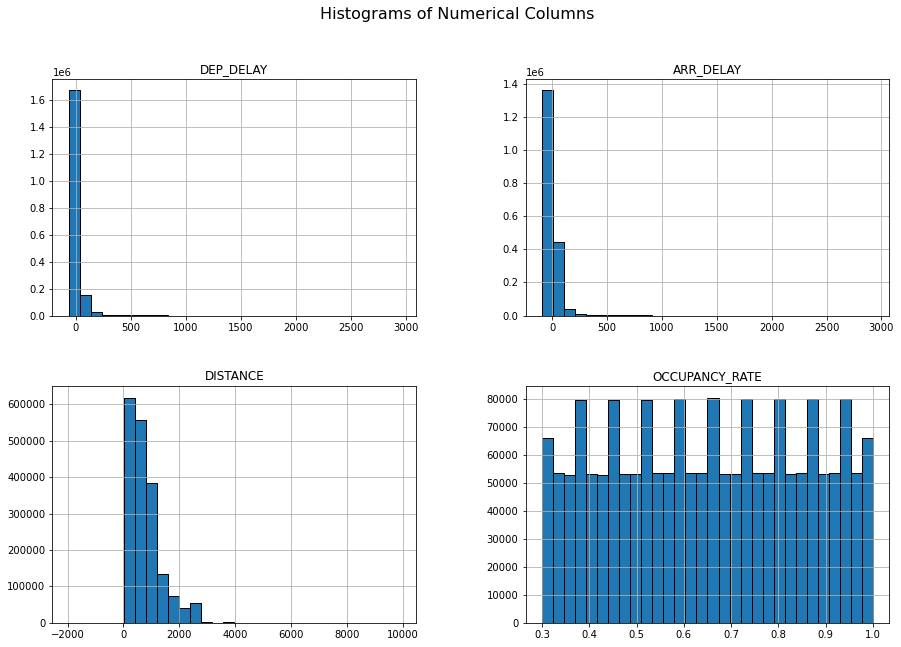

In [ ]:
# # Get variance
# # Columns of interest
columns_of_interest = ['DEP_DELAY', 'ARR_DELAY', 'DISTANCE', 'OCCUPANCY_RATE']

# # Group by ORIGIN and DESTINATION and calculate variance for the selected columns
# variance_by_route = final_flights.groupby(['ORIGIN', 'DESTINATION'])[columns_of_interest].var().reset_index()

# # Display the variance DataFrame
# print(variance_by_route)

# Visualize the variances for each column of interest
final_flights[columns_of_interest].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.show()

Interpretation:
DEP_DELAY and ARR_DELAY:
Both histograms show a large number of flights with delays clustered around 0, with a long tail extending to higher values. This indicates that most flights experience minimal delays, but there are occasional significant delays.
DISTANCE:
The histogram for distance shows most flights have shorter distances, with fewer flights covering longer distances. There are some extreme outliers in the distance data.
OCCUPANCY_RATE:
The occupancy rate appears to be uniformly distributed across its range, indicating that flights have a wide range of occupancy rates from 0.3 to 1.

Next Steps:
Outlier Analysis:

Investigate and potentially handle outliers in DEP_DELAY, ARR_DELAY, and DISTANCE. This could involve filtering, capping, or transforming the data.
Statistical Summary:

Generate a statistical summary to provide more insight into these columns.





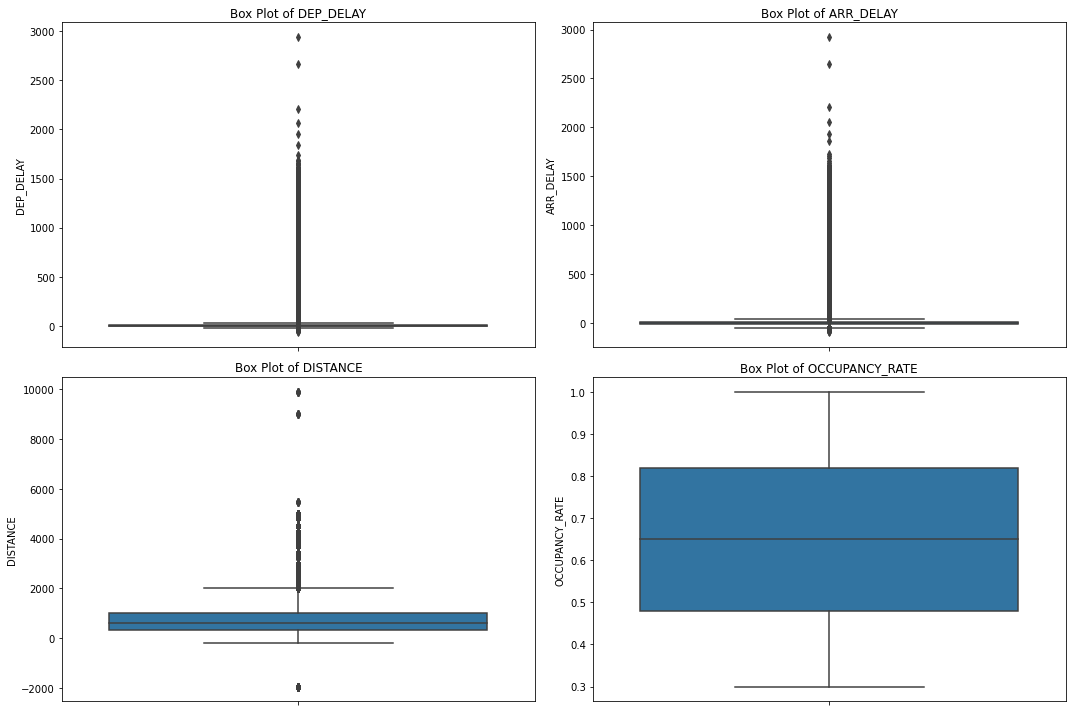

In [ ]:
# Outlier Analysis:

plot_box(final_flights,columns_of_interest)

# Interpretation:
# DEP_DELAY and ARR_DELAY:

# Both plots have a majority of values clustered near the lower end (close to 0), with several high outliers extending up to around 3000.
# The presence of many outliers suggests significant delays for some flights.

# DISTANCE:
# Most distances are clustered around shorter ranges, with a few extreme outliers reaching up to 10,000.
# There are also some negative values, which are likely erroneous.
# OCCUPANCY_RATE:
# The occupancy rate appears to be uniformly distributed, with no significant outliers.


In [ ]:
# Handling Distance outliers

# Distance cannot be negative
#Hawaiian's Honoulu-Boston route is the largest domestic nonstop flight in the US 5,095 miles
#the shortest commercial flight in the United States is a 24-mile route between Petersburg and Wrangle, Alaska

# final_flights[final_flights['DISTANCE'] < 0] 220 rows with -ve distance
#final_flights[final_flights['DISTANCE']>5000] -- 30 rows


# final_flights[final_flights['DISTANCE']< 25] -- 20 records with 2 miles
# per google
# RSW to MCI 1409
# RSW to PVD 1,208

# updated the data
final_flights.loc[(final_flights['ORIGIN'] == 'RSW') & (final_flights['DESTINATION'] == 'PVD'), 'DISTANCE'] = 1200
final_flights.loc[(final_flights['ORIGIN'] == 'RSW') & (final_flights['DESTINATION'] == 'MCI'), 'DISTANCE'] = 1155
# final_flights[(final_flights['ORIGIN'] =='RSW') & (final_flights['DESTINATION'] =='MCI')]
final_flights = final_flights[(final_flights['DISTANCE'] > 0) & (final_flights['DISTANCE'] < 5454)]

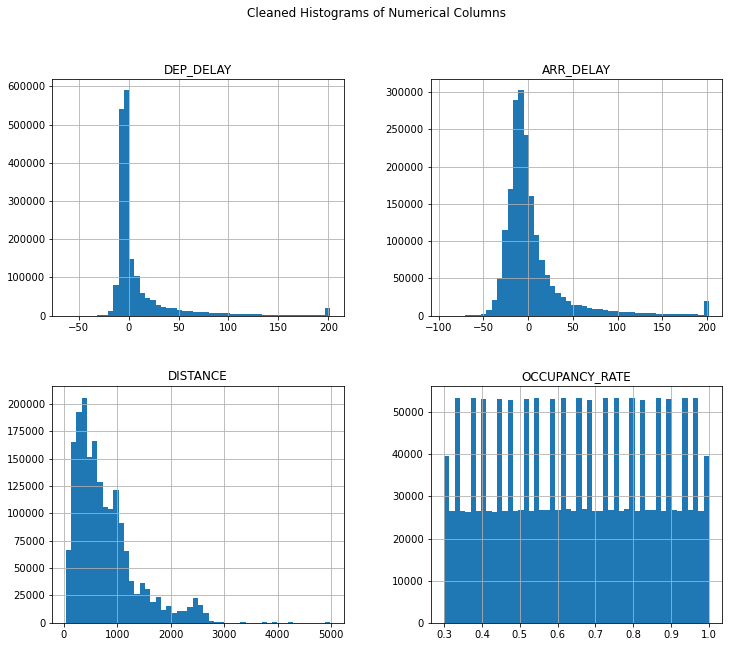

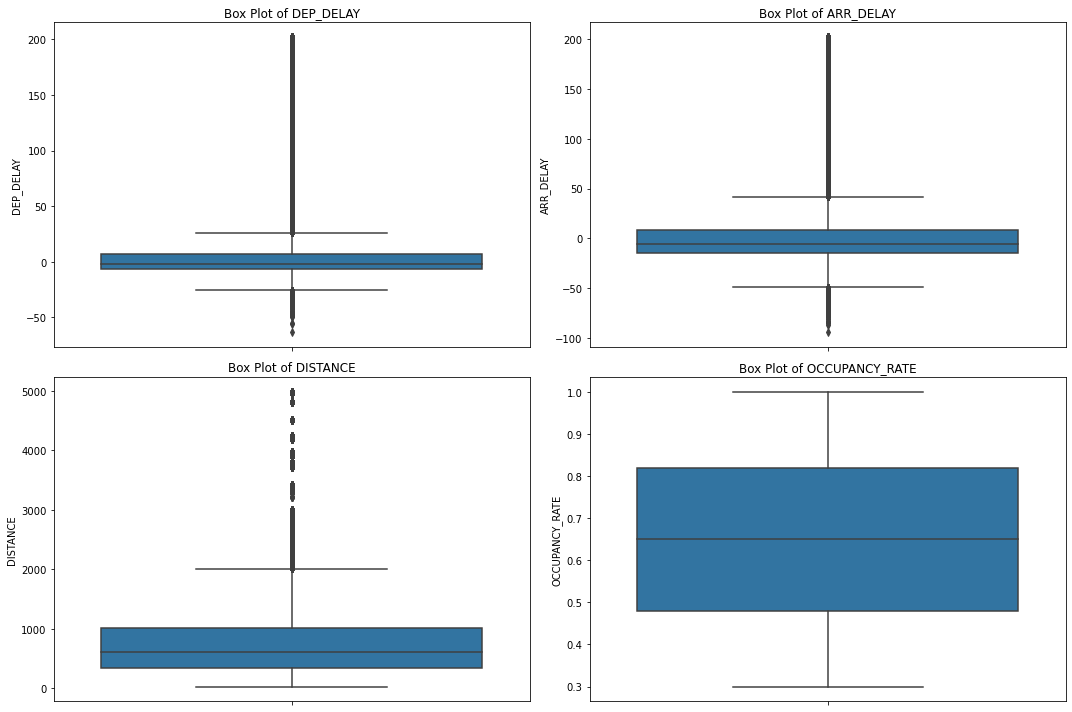

In [ ]:
upper_limit_dep_delay = final_flights['DEP_DELAY'].quantile(0.99)
upper_limit_arr_delay = final_flights['ARR_DELAY'].quantile(0.99)

final_flights['DEP_DELAY'] = np.where(final_flights['DEP_DELAY'] > upper_limit_dep_delay, upper_limit_dep_delay, final_flights['DEP_DELAY'])
final_flights['ARR_DELAY'] = np.where(final_flights['ARR_DELAY'] > upper_limit_arr_delay, upper_limit_arr_delay, final_flights['ARR_DELAY'])

final_flights[final_flights['DEP_DELAY']>upper_limit_dep_delay]


# Re-plotting histograms
plot_histogram(final_flights,columns_of_interest)
plot_box(final_flights,columns_of_interest)



In [ ]:
#Statistical Summary:
print(final_flights[columns_of_interest].describe().round(decimals=2))

        DEP_DELAY   ARR_DELAY    DISTANCE  OCCUPANCY_RATE
count  1864022.00  1864022.00  1864022.00      1864022.00
mean         9.21        4.08      772.79            0.65
std         34.37       37.51      581.49            0.20
min        -63.00      -94.00       31.00            0.30
25%         -6.00      -15.00      345.00            0.48
50%         -2.00       -6.00      612.00            0.65
75%          7.00        8.00     1013.00            0.82
max        202.00      202.00     4983.00            1.00


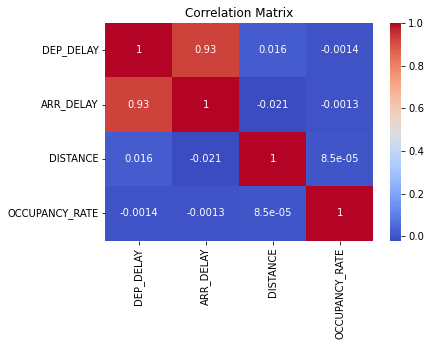

In [ ]:
# Correlation Analysis:
correlation_matrix = final_flights[columns_of_interest].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# group_variance = final_flights.groupby(['ORIGIN', 'DESTINATION'])[columns_of_interest].var().reset_index()
# print(group_variance)


In [ ]:
#-------------------tickets = pd.read_csv('data/tickets.csv')------
review_df(tickets)
# Observations
# tickets: 12x1167285
# Important fields: [YEAR - Q1 2019;QUARTER ; ORIGIN ;DESTINATION; ROUNDTRIP,PASSENGERS,ITIN_FARE
# memory usage: 233.9+ MB
# NULLS
# Counts of Nulls
# ITIN_ID                 0
# YEAR                    0
# QUARTER                 0
# ORIGIN                  0
# ORIGIN_COUNTRY          0
# ORIGIN_STATE_ABR        0
# ORIGIN_STATE_NM         0
# ROUNDTRIP               0
# REPORTING_CARRIER       0
# PASSENGERS           1977
# ITIN_FARE             960
# DESTINATION             0
# dtype: int64

        ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
0  201912723049  2019        1    ABI             US               TX   
1  201912723085  2019        1    ABI             US               TX   
2  201912723491  2019        1    ABI             US               TX   
3  201912723428  2019        1    ABI             US               TX   
4  201912723509  2019        1    ABI             US               TX   

  ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS ITIN_FARE  \
0           Texas        1.0                MQ         1.0     736.0   
1           Texas        1.0                MQ         1.0     570.0   
2           Texas        1.0                MQ         1.0     564.0   
3           Texas        1.0                MQ         1.0     345.0   
4           Texas        0.0                MQ         1.0     309.0   

  DESTINATION  
0         DAB  
1         COS  
2         MCO  
3         LGA  
4         MGM  
-----------------------------

<

In [ ]:
filtered_tickets = tickets[tickets['ROUNDTRIP']==1]
review_df(filtered_tickets)
#12X708600

         ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
0   201912723049  2019        1    ABI             US               TX   
1   201912723085  2019        1    ABI             US               TX   
2   201912723491  2019        1    ABI             US               TX   
3   201912723428  2019        1    ABI             US               TX   
10  201912723337  2019        1    ABI             US               TX   

   ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS ITIN_FARE  \
0            Texas        1.0                MQ         1.0     736.0   
1            Texas        1.0                MQ         1.0     570.0   
2            Texas        1.0                MQ         1.0     564.0   
3            Texas        1.0                MQ         1.0     345.0   
10           Texas        1.0                MQ         1.0    1647.0   

   DESTINATION  
0          DAB  
1          COS  
2          MCO  
3          LGA  
10         JAX  
--------------

In [ ]:
#Nulls
# PASSENGERS           1197
# ITIN_FARE             560
filtered_tickets=filtered_tickets.copy()
# Drop rows where either 'PASSENGERS' or 'ITIN_FARE' is null
filtered_tickets.dropna(subset=['ITIN_FARE'], inplace=True)
review_df(filtered_tickets)

         ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
0   201912723049  2019        1    ABI             US               TX   
1   201912723085  2019        1    ABI             US               TX   
2   201912723491  2019        1    ABI             US               TX   
3   201912723428  2019        1    ABI             US               TX   
10  201912723337  2019        1    ABI             US               TX   

   ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIER  PASSENGERS ITIN_FARE  \
0            Texas        1.0                MQ         1.0     736.0   
1            Texas        1.0                MQ         1.0     570.0   
2            Texas        1.0                MQ         1.0     564.0   
3            Texas        1.0                MQ         1.0     345.0   
10           Texas        1.0                MQ         1.0    1647.0   

   DESTINATION  
0          DAB  
1          COS  
2          MCO  
3          LGA  
10         JAX  
--------------

In [ ]:

# Create a unique identifier for each roundtrip flight
filtered_tickets['FLIGHT_ID'] = filtered_tickets.apply(lambda row: '-'.join(sorted([row['ORIGIN'], row['DESTINATION']])), axis=1)
mask1 = filtered_tickets['FLIGHT_ID'] == 'DFW-ORD'
print(filtered_tickets[mask1])

              ITIN_ID  YEAR  QUARTER ORIGIN ORIGIN_COUNTRY ORIGIN_STATE_ABR  \
295753    20191362092  2019        1    DFW             US               TX   
295792    20191362668  2019        1    DFW             US               TX   
295842    20191362129  2019        1    DFW             US               TX   
295851   201913653262  2019        1    DFW             US               TX   
295865    20191361778  2019        1    DFW             US               TX   
...               ...   ...      ...    ...            ...              ...   
1090963   20191758729  2019        1    ORD             US               IL   
1090980   20191758893  2019        1    ORD             US               IL   
1091022  201912947295  2019        1    ORD             US               IL   
1091032  201914004850  2019        1    ORD             US               IL   
1091053  201912815487  2019        1    ORD             US               IL   

        ORIGIN_STATE_NM  ROUNDTRIP REPORTING_CARRIE

In [ ]:
# Filter non-numeric values in 'ITIN_FARE'
non_numeric_fares = filtered_tickets[pd.to_numeric(filtered_tickets['ITIN_FARE'], errors='coerce').isna()]

# Display non-numeric 'ITIN_FARE' values
print(non_numeric_fares['ITIN_FARE'].unique())



['820$$$' '200 $' '$ 100.00']


In [ ]:
# since the error was a '$' thats easy to fix
filtered_tickets['ITIN_FARE'] = filtered_tickets['ITIN_FARE'].replace('[\$,]', '', regex=True)

#Test afer cleaning up
# Filter non-numeric values in 'ITIN_FARE'
non_numeric_fares = filtered_tickets[pd.to_numeric(filtered_tickets['ITIN_FARE'], errors='coerce').isna()]
# Display non-numeric 'ITIN_FARE' values
print(non_numeric_fares['ITIN_FARE'].unique())

# Convert 'ITIN_FARE' to numeric, coercing errors to NaN
filtered_tickets['ITIN_FARE'] = pd.to_numeric(filtered_tickets['ITIN_FARE'], errors='raise')


[]


In [ ]:
tickets_grouped_stats = filtered_tickets.groupby('FLIGHT_ID').agg({
    'ITIN_FARE': ['mean', 'median', 'max', 'min', 'count']
})

# Flatten the MultiIndex columns
tickets_grouped_stats.columns = ['_'.join(col) for col in tickets_grouped_stats.columns]

print(tickets_grouped_stats)
# tickets_grouped_stats.to_csv('tickets_grouped_stats.csv')

           ITIN_FARE_mean  ITIN_FARE_median  ITIN_FARE_max  ITIN_FARE_min  \
FLIGHT_ID                                                                   
ABE-ABI        758.000000             758.0          758.0          758.0   
ABE-ABQ        534.000000             534.0          631.0          437.0   
ABE-AGS        391.000000             299.0          704.0          170.0   
ABE-AMA        654.000000             654.0          654.0          654.0   
ABE-ASE        742.000000             742.0          889.0          595.0   
...                   ...               ...            ...            ...   
VLD-XNA        778.666667             791.0          835.0          710.0   
VPS-XNA        270.900000             131.5         1198.0           74.0   
VPS-YUM        796.000000             796.0          796.0          796.0   
WRG-YAK        745.000000             745.0          745.0          745.0   
XNA-YKM        461.000000             461.0          461.0          461.0   

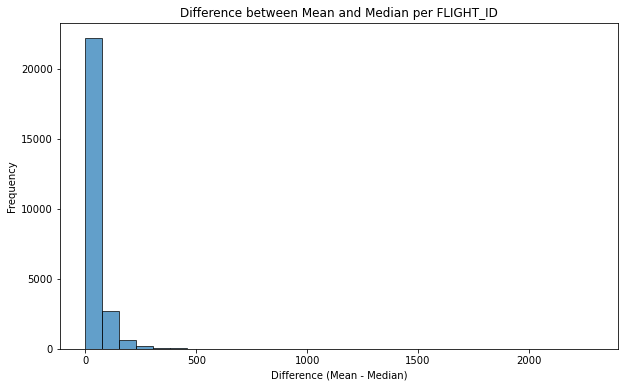

In [ ]:
tickets_grouped_stats['Mean_Median_Diff'] = abs(tickets_grouped_stats['ITIN_FARE_mean'] - tickets_grouped_stats['ITIN_FARE_median'])
# Plot the difference
plt.figure(figsize=(10, 6))
plt.hist(tickets_grouped_stats['Mean_Median_Diff'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Difference between Mean and Median per FLIGHT_ID')
plt.xlabel('Difference (Mean - Median)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Final cleaned tables
# final_airport_codes
# final_flights
# tickets_grouped_stats

# mask3 = (final_flights['ORIGIN'] == 'ORF') & (final_flights['DESTINATION'] == 'DFW')
# print(final_flights[mask3])
final_flights['FLIGHT_ID'] = final_flights.apply(lambda row: '-'.join(sorted([row['ORIGIN'], row['DESTINATION']])), axis=1)
print(final_flights[final_flights['FLIGHT_ID']=='DFW-ORD'])

            FL_DATE ORIGIN DESTINATION  DEP_DELAY  ARR_DELAY  CANCELLED  \
18513    2019-03-13    DFW         ORD       -5.0       -4.0        0.0   
20886    2019-03-14    DFW         ORD        5.0       25.0        0.0   
22120    2019-03-25    DFW         ORD       -5.0      -13.0        0.0   
22741    2019-03-24    ORD         DFW       -6.0       18.0        0.0   
23280    2019-03-24    DFW         ORD      -10.0       17.0        0.0   
...             ...    ...         ...        ...        ...        ...   
1907567  2019-01-08    DFW         ORD       19.0       23.0        0.0   
1908024  2019-01-07    ORD         DFW       -3.0       -8.0        0.0   
1908116  2019-01-07    ORD         DFW       -2.0       -4.0        0.0   
1908120  2019-01-07    DFW         ORD       -4.0      -19.0        0.0   
1908138  2019-01-07    ORD         DFW       -1.0       -3.0        0.0   

         DISTANCE  OCCUPANCY_RATE OP_CARRIER FLIGHT_ID  
18513       801.0            0.41         

In [ ]:

# Step 1: Extract IATA codes from final_airport_codes
iata_codes = final_airport_codes['IATA_CODE'].unique()

# Step 2: Check if either origin or destination in final_flights is in the IATA codes
check1 = final_flights['ORIGIN'].isin(iata_codes)
check2 = final_flights['DESTINATION'].isin(iata_codes)

final_flights['Medium_large_airport'] = check1 | check2

# Filter the rows where either the origin or destination is in the IATA codes
final_flights_ml = final_flights[final_flights['Medium_large_airport']]

print(final_flights_ml)





            FL_DATE ORIGIN DESTINATION  DEP_DELAY  ARR_DELAY  CANCELLED  \
0        2019-03-02    RSW         CLE       -8.0       -6.0        0.0   
1        2019-03-02    RSW         CMH        1.0        5.0        0.0   
2        2019-03-02    RSW         CMH        0.0        4.0        0.0   
3        2019-03-02    RSW         CMH       11.0       14.0        0.0   
4        2019-03-02    RSW         DAL        0.0      -17.0        0.0   
...             ...    ...         ...        ...        ...        ...   
1915881     3/23/19    TUL         CLT       -9.0       -6.0        0.0   
1915882     3/24/19    TUL         CLT       -2.0       -1.0        0.0   
1915883     3/25/19    TUL         CLT       -8.0      -25.0        0.0   
1915884     3/26/19    TUL         CLT       -9.0       -6.0        0.0   
1915885     3/27/19    TUL         CLT       -8.0        5.0        0.0   

         DISTANCE  OCCUPANCY_RATE OP_CARRIER FLIGHT_ID  Medium_large_airport  
0          1025.0   

In [ ]:
print(final_airport_codes)

                 TYPE ISO_COUNTRY IATA_CODE
6194   medium_airport          US       WKK
26143  medium_airport          US       ABE
26144  medium_airport          US       ABI
26145   large_airport          US       ABQ
26146  medium_airport          US       ABR
...               ...         ...       ...
38972  medium_airport          US       OGG
38974  medium_airport          US       BSF
38975  medium_airport          US       ITO
38976  medium_airport          US       UPP
39286  medium_airport          US       PIZ

[821 rows x 3 columns]


In [ ]:
# Create a cost mapping
cost_mapping = {
    'medium_airport': 5000,
    'large_airport': 10000
}
# Merge the size information for origin airport
final_flights_ml = final_flights_ml.merge(final_airport_codes, left_on='ORIGIN', right_on='IATA_CODE', how='left', suffixes=('', '_ORIGIN'))
final_flights_ml.rename(columns={'TYPE': 'ORIGIN_SIZE'}, inplace=True)
final_flights_ml = final_flights_ml.merge(final_airport_codes, left_on='DESTINATION', right_on='IATA_CODE', how='left', suffixes=('', '_DEST'))
final_flights_ml.rename(columns={'TYPE': 'DEST_SIZE'}, inplace=True)
# Calculate the operating cost for both origin and destination
final_flights_ml['OPERATING_COST'] = final_flights_ml['ORIGIN_SIZE'].map(cost_mapping) + final_flights_ml['DEST_SIZE'].map(cost_mapping)

print(final_flights_ml)

            FL_DATE ORIGIN DESTINATION  DEP_DELAY  ARR_DELAY  CANCELLED  \
0        2019-03-02    RSW         CLE       -8.0       -6.0        0.0   
1        2019-03-02    RSW         CMH        1.0        5.0        0.0   
2        2019-03-02    RSW         CMH        0.0        4.0        0.0   
3        2019-03-02    RSW         CMH       11.0       14.0        0.0   
4        2019-03-02    RSW         DAL        0.0      -17.0        0.0   
...             ...    ...         ...        ...        ...        ...   
1863260     3/23/19    TUL         CLT       -9.0       -6.0        0.0   
1863261     3/24/19    TUL         CLT       -2.0       -1.0        0.0   
1863262     3/25/19    TUL         CLT       -8.0      -25.0        0.0   
1863263     3/26/19    TUL         CLT       -9.0       -6.0        0.0   
1863264     3/27/19    TUL         CLT       -8.0        5.0        0.0   

         DISTANCE  OCCUPANCY_RATE OP_CARRIER FLIGHT_ID  Medium_large_airport  \
0          1025.0  

In [ ]:
# Step 1: Group by FLIGHT_ID and count unique OP_CARRIER values
competitors_counts = final_flights_ml.groupby('FLIGHT_ID')['OP_CARRIER'].nunique().reset_index()
competitors_counts.columns = ['FLIGHT_ID', 'Competitors']

# Step 2: Merge the counts back to the original DataFrame
final_flights_ml = final_flights_ml.merge(competitors_counts, on='FLIGHT_ID', how='left')

print(final_flights_ml[final_flights_ml['DEST_SIZE']=='medium_airport'])



            FL_DATE ORIGIN DESTINATION  DEP_DELAY  ARR_DELAY  CANCELLED  \
5        2019-03-02    RSW         GRR       -2.0       -8.0        0.0   
39       2019-03-02    SAN         ELP       32.0       19.0        0.0   
120      2019-03-02    SAT         ELP       -3.0       -8.0        0.0   
168      2019-03-02    SFO         BUR        6.0      -12.0        0.0   
169      2019-03-02    SFO         BUR       -1.0      -17.0        0.0   
...             ...    ...         ...        ...        ...        ...   
1858583  2019-01-03    DEN         IDA        7.0       -3.0        0.0   
1858595  2019-01-03    DEN         RAP       -3.0      -17.0        0.0   
1858601  2019-01-03    ORD         CAK       -7.0      -16.0        0.0   
1858610  2019-01-03    ORD         LAN       -4.0       -6.0        0.0   
1858612  2019-01-03    ORD         CAK       -4.0       -8.0        0.0   

         DISTANCE  OCCUPANCY_RATE OP_CARRIER FLIGHT_ID  Medium_large_airport  \
5          1147.0  

In [ ]:
final_flights_grouped = final_flights_ml.groupby('FLIGHT_ID').agg({
    'DEP_DELAY': ['mean','count'],
    'ARR_DELAY': ['mean','count'],
    'DISTANCE': ['median','count'],
    'OCCUPANCY_RATE': ['mean','count'],
    'OPERATING_COST':['max','count'],
    'Competitors':['max','count']
})

# Flatten the MultiIndex columns
final_flights_grouped.columns = ['_'.join(col) for col in final_flights_grouped.columns]


In [ ]:


print(final_flights_grouped.loc['DFW-ORD'])

DEP_DELAY_mean             14.465791
DEP_DELAY_count          3274.000000
ARR_DELAY_mean             10.802688
ARR_DELAY_count          3274.000000
DISTANCE_median           801.000000
DISTANCE_count           3274.000000
OCCUPANCY_RATE_mean         0.658534
OCCUPANCY_RATE_count     3274.000000
OPERATING_COST_max      20000.000000
OPERATING_COST_count     3274.000000
Competitors_max             6.000000
Competitors_count        3274.000000
Name: DFW-ORD, dtype: float64


In [ ]:
print(final_flights_grouped)

           DEP_DELAY_mean  DEP_DELAY_count  ARR_DELAY_mean  ARR_DELAY_count  \
FLIGHT_ID                                                                     
ABE-ATL          6.246544              434        2.000000              434   
ABE-CLT          3.350598              502        1.051793              502   
ABE-DTW         11.517103              497        4.217304              497   
ABE-FLL          5.400000               40        4.250000               40   
ABE-ORD         26.918750              320       21.468750              320   
...                   ...              ...             ...              ...   
STL-TPA         11.230404              421        4.983373              421   
STL-TUL          6.052308              325        0.138462              325   
SYR-TPA         21.625000               72        9.208333               72   
TPA-TTN         13.305732              157        5.891720              157   
VPS-XNA         16.880000               25       20.

In [ ]:
print(tickets_grouped_stats)

           ITIN_FARE_mean  ITIN_FARE_median  ITIN_FARE_max  ITIN_FARE_min  \
FLIGHT_ID                                                                   
ABE-ABI        758.000000             758.0          758.0          758.0   
ABE-ABQ        534.000000             534.0          631.0          437.0   
ABE-AGS        391.000000             299.0          704.0          170.0   
ABE-AMA        654.000000             654.0          654.0          654.0   
ABE-ASE        742.000000             742.0          889.0          595.0   
...                   ...               ...            ...            ...   
VLD-XNA        778.666667             791.0          835.0          710.0   
VPS-XNA        270.900000             131.5         1198.0           74.0   
VPS-YUM        796.000000             796.0          796.0          796.0   
WRG-YAK        745.000000             745.0          745.0          745.0   
XNA-YKM        461.000000             461.0          461.0          461.0   

In [ ]:
# Perform the left join on FLIGHT_ID
merged_df = final_flights_grouped.merge(tickets_grouped_stats, on='FLIGHT_ID', how='left')
final_merged_df = merged_df[['DEP_DELAY_mean','ARR_DELAY_mean','DISTANCE_median','OCCUPANCY_RATE_mean','ITIN_FARE_mean','OPERATING_COST_max','Competitors_max','ITIN_FARE_count','OCCUPANCY_RATE_count']]

# Display the resulting DataFrame
# print(final_merged_df.loc['DFW-ORD'])

In [ ]:
# Apply the operation to all rows in the 'OPERATING_COST_max' column
final_merged_df.loc[:, 'OPERATING_COST_max'] = final_merged_df.loc[:, 'OPERATING_COST_max'] * 2

print(final_merged_df)

           DEP_DELAY_mean  ARR_DELAY_mean  DISTANCE_median  \
FLIGHT_ID                                                    
ABE-ATL          6.246544        2.000000            692.0   
ABE-CLT          3.350598        1.051793            481.0   
ABE-DTW         11.517103        4.217304            425.0   
ABE-FLL          5.400000        4.250000           1041.0   
ABE-ORD         26.918750       21.468750            654.0   
...                   ...             ...              ...   
STL-TPA         11.230404        4.983373            869.0   
STL-TUL          6.052308        0.138462            351.0   
SYR-TPA         21.625000        9.208333           1104.0   
TPA-TTN         13.305732        5.891720            955.0   
VPS-XNA         16.880000       20.880000            601.0   

           OCCUPANCY_RATE_mean  ITIN_FARE_mean  OPERATING_COST_max  \
FLIGHT_ID                                                            
ABE-ATL               0.654332      557.141176       

/Users/sikalp/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
# Rename the column
final_merged_df = final_merged_df.rename(columns={'ITIN_FARE_count': 'Ticket_Cnt','OCCUPANCY_RATE_count': 'Flight_Cnt','Competitors_max':'Competitors'}

                                        )
print(final_merged_df)

           DEP_DELAY_mean  ARR_DELAY_mean  DISTANCE_median  \
FLIGHT_ID                                                    
ABE-ATL          6.246544        2.000000            692.0   
ABE-CLT          3.350598        1.051793            481.0   
ABE-DTW         11.517103        4.217304            425.0   
ABE-FLL          5.400000        4.250000           1041.0   
ABE-ORD         26.918750       21.468750            654.0   
...                   ...             ...              ...   
STL-TPA         11.230404        4.983373            869.0   
STL-TUL          6.052308        0.138462            351.0   
SYR-TPA         21.625000        9.208333           1104.0   
TPA-TTN         13.305732        5.891720            955.0   
VPS-XNA         16.880000       20.880000            601.0   

           OCCUPANCY_RATE_mean  ITIN_FARE_mean  OPERATING_COST_max  \
FLIGHT_ID                                                            
ABE-ATL               0.654332      557.141176       

In [ ]:
final_merged_df['TOT_PASSENGERS'] = (200 *final_merged_df['OCCUPANCY_RATE_mean'])
final_merged_df['BAGGAGE_REV'] = (100 *final_merged_df['OCCUPANCY_RATE_mean'])*70
final_merged_df['ARR_DELAY_FEES'] = np.where(final_merged_df['ARR_DELAY_mean'] <= 15, 0, 75 * (final_merged_df['ARR_DELAY_mean'] - 15))
final_merged_df['DEP_DELAY_FEES'] = np.where(final_merged_df['DEP_DELAY_mean'] <= 15, 0, 75 * (final_merged_df['DEP_DELAY_mean'] - 15))
final_merged_df['MISC_COST'] = (9.18 * final_merged_df['DISTANCE_median']*2)

In [ ]:
final_merged_df['TOTAL_COST'] = final_merged_df['MISC_COST'] + final_merged_df['DEP_DELAY_FEES'] + final_merged_df['ARR_DELAY_FEES'] + final_merged_df['OPERATING_COST_max']
final_merged_df['TOTAL_REVENUE'] = final_merged_df['TOT_PASSENGERS']*final_merged_df['ITIN_FARE_mean'] + final_merged_df['BAGGAGE_REV']
final_merged_df['NET_PROFIT'] =final_merged_df['TOTAL_REVENUE'] -final_merged_df['TOTAL_COST']
final_merged_df['Net_Profit_QTR'] = final_merged_df['NET_PROFIT'] * final_merged_df['Flight_Cnt']
final_merged_df['BreakEven'] = 90000000/(final_merged_df['Net_Profit_QTR'][final_merged_df['Net_Profit_QTR']>=0])
#Test
print(final_merged_df.loc['MIA-MSY'])



DEP_DELAY_mean             3.382022
ARR_DELAY_mean             1.344101
DISTANCE_median          675.000000
OCCUPANCY_RATE_mean        0.658385
ITIN_FARE_mean           362.317518
OPERATING_COST_max     40000.000000
Competitors                2.000000
Ticket_Cnt               274.000000
Flight_Cnt               712.000000
TOT_PASSENGERS           131.676966
BAGGAGE_REV             4608.693820
ARR_DELAY_FEES             0.000000
DEP_DELAY_FEES             0.000000
MISC_COST              12393.000000
TOTAL_COST             52393.000000
TOTAL_REVENUE          52317.565458
NET_PROFIT               -75.434542
Net_Profit_QTR        -53709.394161
BreakEven                       NaN
Name: MIA-MSY, dtype: float64


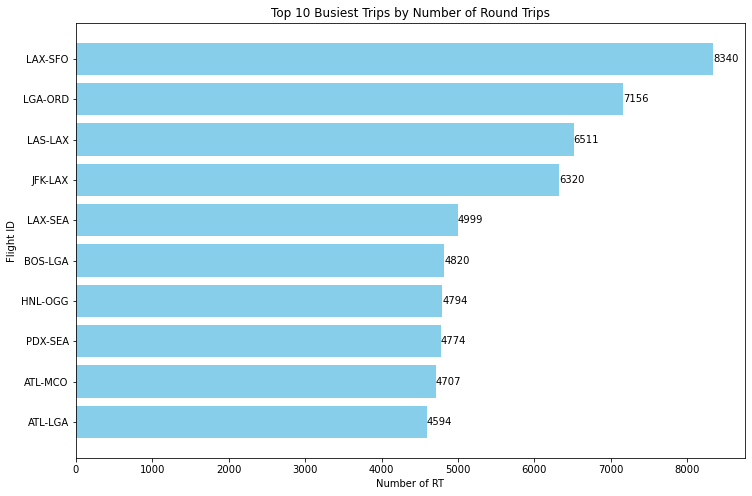

In [ ]:
# Sort by Flight_Cnt in descending order and select the top 10 busiest trips
top_10_busiest_trips = final_merged_df.sort_values(by='Flight_Cnt', ascending=False).head(10)
top_10_profitable_trips = final_merged_df.sort_values(by='NET_PROFIT', ascending=False).head(10)
top_10_profitable_trips_QTR = final_merged_df.sort_values(by='Net_Profit_QTR', ascending=False).head(10)
top_10_breakeven_QTR = final_merged_df.sort_values(by='BreakEven', ascending=True).head(10)
# Plotting the top 10 busiest trips
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_busiest_trips.index, top_10_busiest_trips['Flight_Cnt'], color='skyblue')

# Add labels to the bars
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.0f}',
             va='center', ha='left')

plt.xlabel('Number of RT')
plt.ylabel('Flight ID')
plt.title('Top 10 Busiest Trips by Number of Round Trips')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()






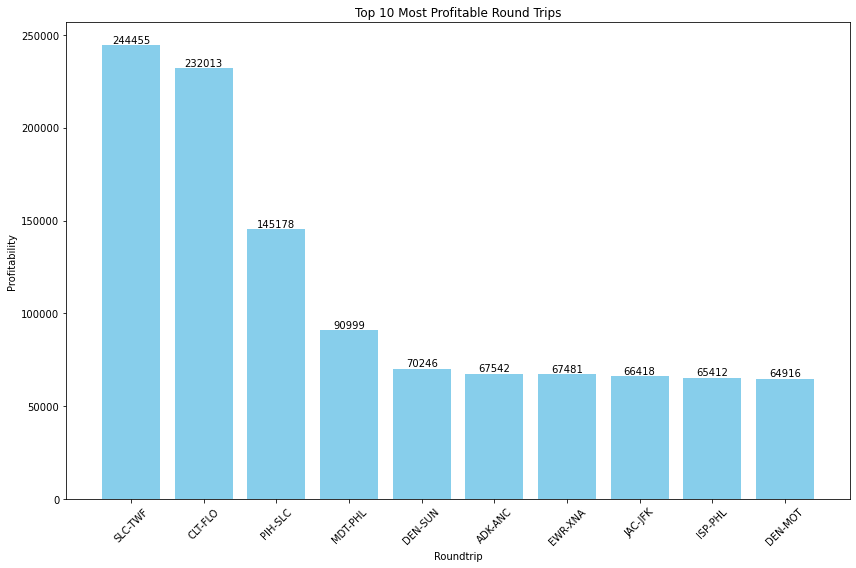

In [ ]:

# Plot the vertical bar chart for top 10 most profitable round trip
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_profitable_trips.index, top_10_profitable_trips['NET_PROFIT'], color='skyblue')

# Add labels to the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.0f}',
             va='bottom', ha='center')

plt.xlabel('Roundtrip')
plt.ylabel('Profitability')
plt.title('Top 10 Most Profitable Round Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



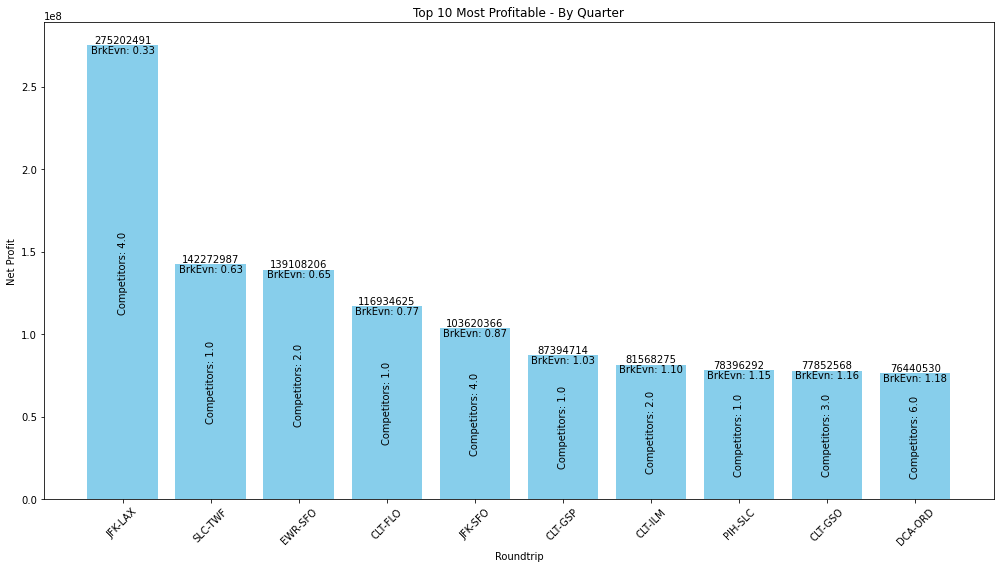

In [ ]:
# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the bars
bars = ax.bar(top_10_profitable_trips_QTR.index, top_10_profitable_trips_QTR['Net_Profit_QTR'], color='skyblue')

# Add labels to the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    competitor_count = top_10_profitable_trips_QTR.iloc[i]['Competitors']
    breakeven_count = top_10_profitable_trips_QTR.iloc[i]['BreakEven']

    # Position for Net Profit value
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{height:.0f}',
            va='bottom', ha='center', fontsize=10)

    # Position for Competitors count
    ax.text(bar.get_x() + bar.get_width()/2, height / 2 + 1,
            f'Competitors: {competitor_count}',
            va='center', ha='center', fontsize=10, rotation=90, color='black')

    # Position for Breakeven count
    ax.text(bar.get_x() + bar.get_width()/2, height + 1,
            f'BrkEvn: {breakeven_count:.2f}',
            va='top', ha='center', fontsize=10, color='black')

# Set labels and title
ax.set_xlabel('Roundtrip')
ax.set_ylabel('Net Profit')
ax.set_title('Top 10 Most Profitable - By Quarter')

# Set x-ticks and labels
ax.set_xticks(range(len(top_10_profitable_trips_QTR.index)))  # Numeric positions for x-ticks
ax.set_xticklabels(top_10_profitable_trips_QTR.index, rotation=45, fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

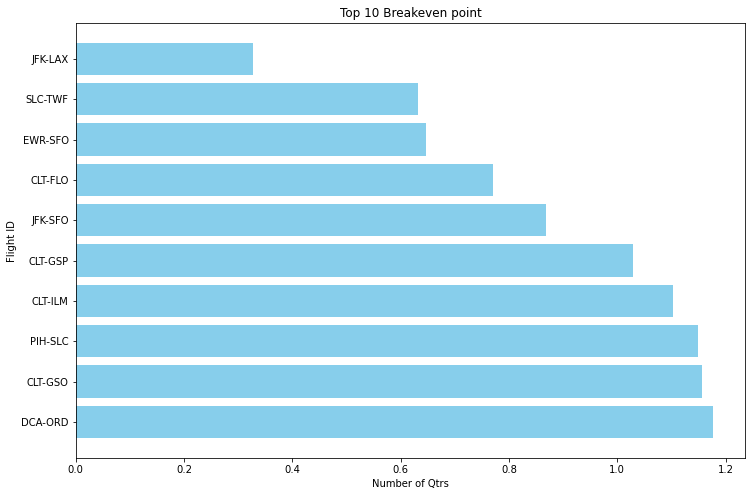

In [ ]:
# Plotting the top quickest breakeven
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_breakeven_QTR.index, top_10_breakeven_QTR['BreakEven'], color='skyblue')

# # Add labels to the bars, ensuring they do not go off the chart
# for bar in bars:
#     # Position the text slightly inside the bar if it would go off the chart
#     plt.text(min(bar.get_width() + 0.5, plt.xlim()[1] - 0.5),
#              bar.get_y() + bar.get_height() / 2,
#              f'{bar.get_width():.2f}',
#              va='center', ha='left')

plt.xlabel('Number of Qtrs')
plt.ylabel('Flight ID')
plt.title('Top 10 Breakeven point')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()